In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=4b024426ffa4e8a6a687bb3c02bb6bc66ec40ff6ba12a8a604e67d0c8b3bb640
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=3124b6baafd7ed914f71b74f390ea90d53acb0efc0f8a8acea435d8b50b9305e
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
import tensorflow as tf
import kerastuner
import numpy as np
import keras

Using TensorFlow backend.


In [ ]:
fasion_minst=keras.datasets.fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=fasion_minst.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [ ]:
x_train=x_train/255

In [ ]:
x_test=x_test/255

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
class_names=['T-shirt','Trouser','pullover','Dress','coat','sandals','shirt','sneakers','Bag','Ankel_boat']

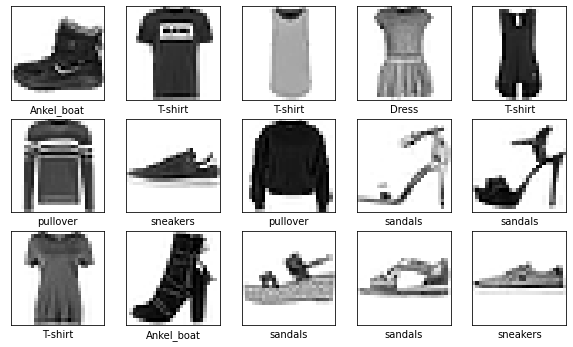

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(15):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i],cmap='binary')
  plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
model=Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5039 - accuracy: 0.8193
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3719 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3321 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3066 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2890 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2719 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2578 - accuracy: 0.9039
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2467 - accuracy: 0.9080
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2367 - accuracy: 0.9114
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.226

In [ ]:
np.argmax(pred[0])

9

In [ ]:
y_test[0]

9

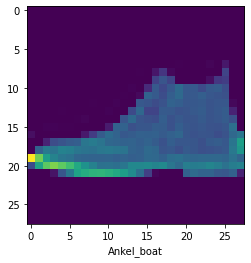

In [ ]:
plt.imshow(x_test[0])
plt.xlabel(class_names[y_test[0]])
plt.show()

In [ ]:
x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)

In [ ]:
x_train[0].shape

(28, 28, 1)

In [ ]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")


In [ ]:
tuner_search.search(x_train,y_train,epochs=3,validation_split=0.1)

Epoch 1/3
 409/1688 [======>.......................] - ETA: 5:53 - loss: 0.5569 - accuracy: 0.7994

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,Dense,MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
modelcnn=Sequential()
modelcnn.add(Conv2D(64,kernel_size=2,activation='relu'))
modelcnn.add(Dropout(0.2))
modelcnn.add(Conv2D(32,kernel_size=2,activation='relu'))
modelcnn.add(Dropout(0.2))
modelcnn.add(Flatten())
modelcnn.add(Dense(128,activation='relu'))
modelcnn.add(Dense(10,activation='softmax'))
modelcnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
modelcnn.fit(x_train,y_train,epochs=4)

Epoch 1/4
1875/1875 [==============================] - 196s 105ms/step - loss: 0.3959 - accuracy: 0.8553
Epoch 2/4
1875/1875 [==============================] - 196s 105ms/step - loss: 0.2590 - accuracy: 0.9041
Epoch 3/4
1875/1875 [==============================] - 194s 103ms/step - loss: 0.2046 - accuracy: 0.9231
Epoch 4/4
1875/1875 [==============================] - 194s 103ms/step - loss: 0.1544 - accuracy: 0.9421


In [ ]:
modelcnn=Sequential()
modelcnn.add(Conv2D(128,kernel_size=2,activation='relu'))
modelcnn.add(MaxPooling2D(2,2))
modelcnn.add(Conv2D(64,kernel_size=2,activation='relu'))
modelcnn.add(MaxPooling2D(2,2))
modelcnn.add(Conv2D(32,kernel_size=2,activation='relu'))
modelcnn.add(MaxPooling2D(2,2))
modelcnn.add(Flatten())
modelcnn.add(Dense(128,activation='relu'))
modelcnn.add(Dense(10,activation='softmax'))
modelcnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
modelcnn.fit(x_train,y_train,epochs=4,batch_size=20)

Epoch 1/4
3000/3000 [==============================] - 119s 40ms/step - loss: 0.5807 - accuracy: 0.7836
Epoch 2/4
3000/3000 [==============================] - 120s 40ms/step - loss: 0.4013 - accuracy: 0.8506
Epoch 3/4
3000/3000 [==============================] - 120s 40ms/step - loss: 0.3563 - accuracy: 0.8669
Epoch 4/4
3000/3000 [==============================] - 119s 40ms/step - loss: 0.3273 - accuracy: 0.8763


In [ ]:
modelcnn=Sequential()
modelcnn.add(Conv2D(128,kernel_size=2,activation='relu',kernel_initializer='he_uniform'))
modelcnn.add(Conv2D(64,kernel_size=2,activation='relu',kernel_initializer='he_uniform'))
modelcnn.add(Conv2D(32,kernel_size=2,activation='relu',kernel_initializer='he_uniform'))
modelcnn.add(Flatten())
modelcnn.add(Dense(128,activation='relu'))
modelcnn.add(Dense(10,activation='softmax'))
modelcnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
modelcnn.fit(x_train,y_train,epochs=4)

Epoch 1/4
1875/1875 [==============================] - 355s 189ms/step - loss: 0.3522 - accuracy: 0.8704
Epoch 2/4
1875/1875 [==============================] - 354s 189ms/step - loss: 0.2159 - accuracy: 0.9182
Epoch 3/4
1875/1875 [==============================] - 353s 188ms/step - loss: 0.1455 - accuracy: 0.9455
Epoch 4/4
1875/1875 [==============================] - 354s 189ms/step - loss: 0.0924 - accuracy: 0.9657
